# Modeling with Linear Regression 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns



## Importing the dataset

In [2]:
data = pd.read_csv('Data/DirectMarketing_Cln_LR.csv')

print(data)




     Salary  Children  Catalogs  Old  Young  Gender  OwnHome  Married  \
0     47500         0         6    1      0       0        0        1   
1     63600         0         6    0      0       1        1        1   
2     13500         0        18    0      1       0        1        1   
3     85600         1        18    0      0       1        0        0   
4     68400         0        12    0      0       0        0        1   
..      ...       ...       ...  ...    ...     ...      ...      ...   
995   19400         1        18    0      1       0        1        1   
996   40500         1        18    0      0       1        1        1   
997   44800         0        24    1      0       1        0        1   
998   79000         2        18    0      0       1        0        0   
999   53600         1        24    0      1       1        1        0   

     Distance  AmountSpent  
0           1          755  
1           0         1318  
2           0          296  
3      

In [3]:
print(data.columns)

Index(['Salary', 'Children', 'Catalogs', 'Old', 'Young', 'Gender', 'OwnHome',
       'Married', 'Distance', 'AmountSpent'],
      dtype='object')


In [4]:
#seperating independent and dependent variables
X = data.drop(['AmountSpent'], axis=1).values
y = data['AmountSpent'].values
sc = StandardScaler()
X = sc.fit_transform(X)


In [5]:
# Attempt at feature reduction using PCA 

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.1, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(X)

# Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 9
Reduced number of features: 1


#### Run Model with all features

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred_all_features = model.predict(X_test)

coefficient of determination: 0.7116840833488567
intercept: 1212.2696546624393
slope: [ 659.9865722  -242.52033347  277.79307114    8.29311373   41.7857009
  -13.83307476  -28.35909887   20.89203709  216.99246537]


## Coefficient of determination
#### The $R^2$ value of 0.71 or confidence interval of 71% 


## Intercept
#### Intercept of 1203.845 is the amount that would be spent if all independent variables were zero. 

## Slope
#### For each predictor 'Salary', 'Children', 'Catalogs', 'Old', 'Young', 'Gender', 'OwnHome','Married', 'Distance',  if their value goes up by one, 'AmountSpent', will be their respective slope in  [656.57093037 -243.50236366  277.64981606    8.34886099   41.6982116 -13.83389792  -28.37283187   20.89161662  218.61659718]. For example, for every one dollar increase in salary, amount spent will increase by 656.57, and decrease by 243.50 for every added child. It is worth noting the variations of increase/decrease among features.
       

#### Run Model with reduced   dimentianlity using PCA

In [7]:
X = features_pca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred_pca = model.predict(X_test)

coefficient of determination: 0.4735520252325828
intercept: 1203.845
slope: [658.74085737]


#### Note that reduced dimentianility lowered $R^2$ to 47%. Intercept did not change and 1 dollar increase in salary added 659 to amount spent which is only 3 dollars more than all features included in the model.

#### Run Model with ['Salary', 'Children', 'Catalogs','Gender']

In [8]:
X = data[['Salary', 'Children', 'Catalogs','Gender']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred_selected_features = model.predict(X_test)

coefficient of determination: 0.6597996191982207
intercept: 1203.845
slope: [ 614.7067424  -240.54417011  313.69381329  -16.59658213]


#### In this case, $R^2$ went up to 65% . Intercept did not change and 1 dollar increase in salary added 614 to amount spent which is lower than the previous 2 models

## Evaluating results

In [25]:
data = {'TestData': y_test, 'PredAllFeatures': y_pred_all_features, 'PredPca':y_pred_pca,'PredSelect':y_pred_selected_features}
data

{'TestData': array([ 857, 2191, 1071,  983, 1485, 1634,  917, 1120,  821, 2574, 1437,
        2339, 2279,  616, 1047, 3079,  550,  782,  909, 5878, 1355, 1781,
        1398,  417,  314,  451, 2150,  863, 1322,  617,  791, 1905,  197,
        1021, 3941, 1308,  220, 2610,  788,  160,  947, 1011, 1513, 1753,
         470,  619,  260, 3082, 1699,  384,  654, 2226, 1594,  183, 1081,
         567, 1197,  630, 1666, 1384, 2070,  690,  881, 1757,  824, 2904,
        2710,   65,  245, 1956,  216, 2224, 1512,  606,  173, 1310,  708,
        1523,  915,  422, 1789,  705,  907,  445,  529,  941,  409,  642,
         794,  170,  358, 2681,  753, 1685,  192,  841,  164,  191, 2183,
         581, 1012, 2136, 1473,  474,  788,  167, 3293, 1414, 1560,  395,
         233,  954,  422,  614,  929, 1582,  163, 2632,  344,  195,  473,
        2321, 2436,  202,  902, 2935, 3168, 2561, 1821, 1062,  586, 1654,
         206,  296, 1417, 1320, 2523, 2318, 3063, 1500,  615, 1702, 1773,
        1944, 1153,  371, 

In [26]:
df = pd.DataFrame(data=data)
df.head()

,TestData,PredAllFeatures,PredPca,PredSelect
0,857,1295.534434,1061.925885,1493.792637
1,2191,1887.888907,1364.254187,1537.672161
2,1071,1550.032086,1341.560353,1219.302853
3,983,1410.275587,1299.308579,1696.369370
4,1485,2265.459399,2286.929765,2319.889819


In [27]:
TestData = pd.Series(df['TestData'])
# Med
Median_bound = TestData.quantile(0.50)
# Third
Third_bound = TestData.quantile(0.75)

df.loc[(df['TestData'] <= Median_bound),'Test_cls'] = 'Low'  
df.loc[(df['TestData'] > Median_bound) & (df['TestData'] <= Third_bound), 'Test_cls'] = 'Med'  
df.loc[(df['TestData'] > Third_bound), 'Test_cls'] = 'High'  

PredPcaData = pd.Series(df['PredPca'])

# Med
Median_bound = PredPcaData.quantile(0.50)

# Third
Third_bound = PredPcaData.quantile(0.75)

df.loc[(df['PredPca'] <= Median_bound),'PredPca_cls'] = 'Low'  
df.loc[(df['PredPca'] > Median_bound) & (df['PredPca'] <= Third_bound), 'PredPca_cls'] = 'Med'  
df.loc[(df['PredPca'] > Third_bound), 'PredPca_cls'] = 'High'  
df

,TestData,PredAllFeatures,PredPca,PredSelect,Test_cls,PredPca_cls
0,857,1295.534434,1061.925885,1493.792637,Low,Low
1,2191,1887.888907,1364.254187,1537.672161,High,Med
2,1071,1550.032086,1341.560353,1219.302853,Med,Med
3,983,1410.275587,1299.308579,1696.369370,Low,Low
4,1485,2265.459399,2286.929765,2319.889819,Med,High
...,...,...,...,...,...,...
195,1985,1821.640592,1940.478024,1554.137377,High,High
196,757,614.882612,1596.266268,733.132763,Low,Med
197,526,492.118473,1229.000783,671.297056,Low,Low
198,340,540.845802,1645.421998,688.728512,Low,Med


In [29]:
from sklearn import metrics 
conf_matrix_lr = pd.DataFrame(metrics.confusion_matrix(df['Test_cls'], df['PredPca_cls']), index = ['actual high', 'actual med', 'actual low'], 
                               columns = ['predicted high', 'predicted med', 'predicted low'])

conf_matrix_lr

,predicted high,predicted low,predicted med
actual high,34,3,13
actual low,4,78,18
actual med,12,19,19


In [185]:
# accuracy score
metrics.accuracy_score(df['Test_cls'], df['PredPca_cls'])

array([0.68, 0.78, 0.38])

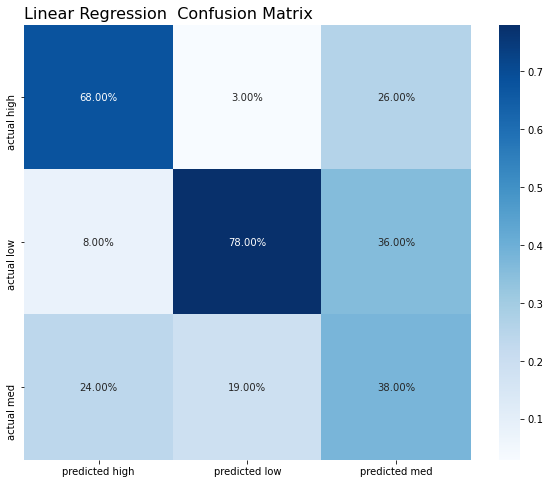

In [186]:
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(conf_matrix_lr/np.sum(conf_matrix_lr), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Linear Regression  Confusion Matrix', fontsize = 16, loc='left')

plt.show()

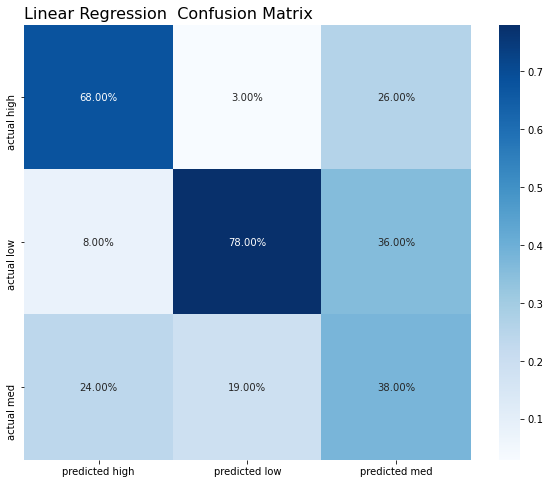

In [187]:
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(conf_matrix_lr/np.sum(conf_matrix_lr), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Linear Regression  Confusion Matrix', fontsize = 16, loc='left')

plt.show()